# Configurações

In [1]:
import cv2

imagem = cv2.imread('face.jpg')

cv2.imshow('Image', imagem)
cv2.waitKey(0)
cv2.destroyAllWindows()



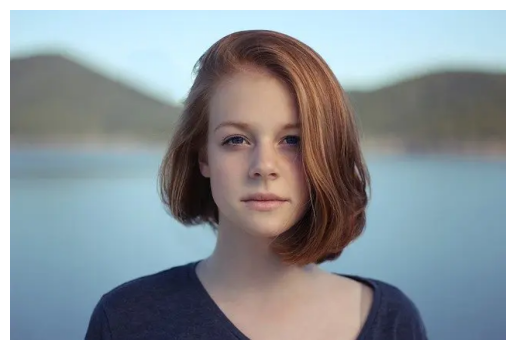

In [2]:
import cv2
import matplotlib.pyplot as plt

imagem = cv2.imread('face.jpg')

imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

# bordas = cv2.Canny(imagem_gray, 100, 200)

plt.imshow(imagem_rgb)
plt.axis('off')
plt.show()

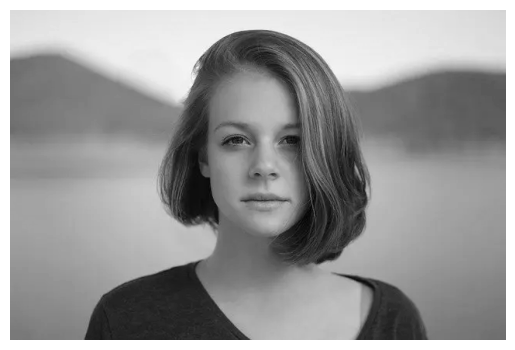

In [3]:
import cv2
import matplotlib.pyplot as plt

# Carregar a imagem
imagem = cv2.imread('face.jpg')

# Converter a imagem suavizada para tons de cinza
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

# Mostrar a imagem em tons de cinza
plt.imshow(imagem_gray, cmap='gray')
plt.axis('off')
plt.show()

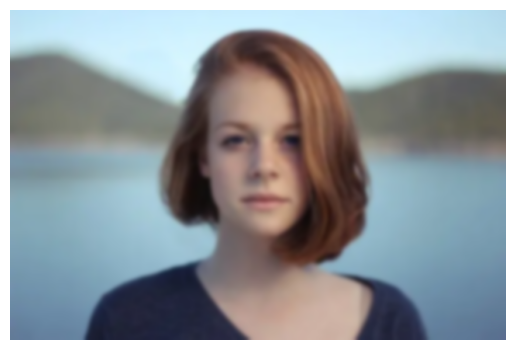

In [4]:
import cv2
import matplotlib.pyplot as plt

imagem = cv2.imread('face.jpg')

# imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

imagem_suavizada = cv2.GaussianBlur(imagem, (15, 15), 0)

imagem = cv2.cvtColor(imagem_suavizada, cv2.COLOR_BGR2RGB)

# bordas = cv2.Canny(imagem_gray, 100, 200)

plt.imshow(imagem)
plt.axis('off')
plt.show()

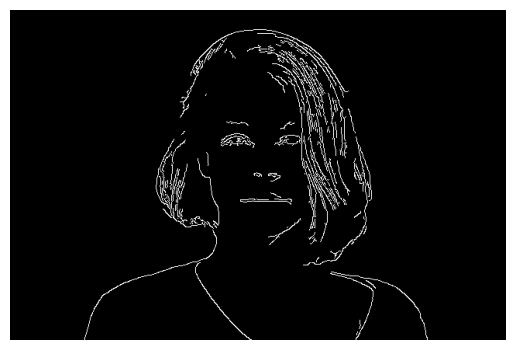

In [5]:
import cv2
import matplotlib.pyplot as plt

imagem = cv2.imread('face.jpg')

imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

bordas = cv2.Canny(imagem_gray, 100, 200)

plt.imshow(bordas, cmap='gray')
plt.axis('off')
plt.show()

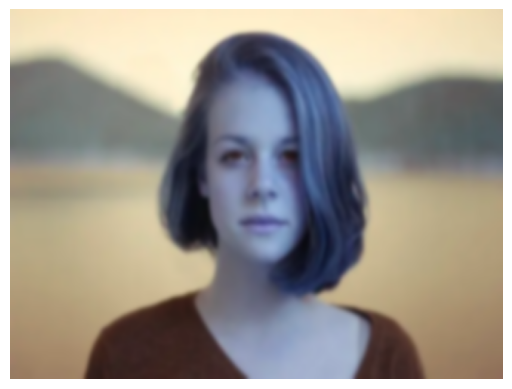

In [6]:
largura = 800
altura = 600
dimensoes = (largura, altura)

imagem_redimensionada = cv2.resize(imagem_suavizada, dimensoes, interpolation=cv2.INTER_AREA)

plt.imshow(imagem_redimensionada)
plt.axis('off')
plt.show()

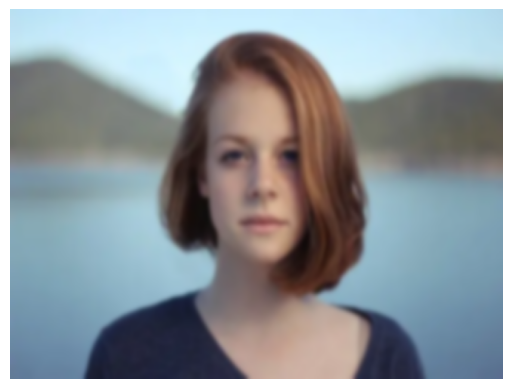

In [7]:
inicio = (500, 20) 
fim = (170, 350)
cor = (255, 0, 0)
espessura = 2

imagem_com_retangulo = cv2.rectangle(imagem_redimensionada.copy(), inicio, fim, cor, espessura)

imagem_cvt_color = cv2.cvtColor(imagem_redimensionada, cv2.COLOR_BGR2RGB)

plt.imshow(imagem_cvt_color)
plt.axis('off')
plt.show()

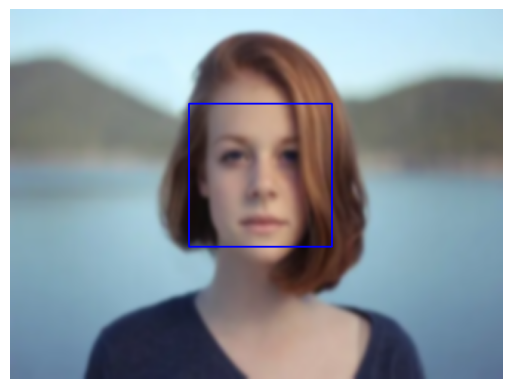

In [12]:



# Carregar o classificador de cascata de Haar
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Detectar faces na imagem
faces = face_cascade.detectMultiScale(imagem_redimensionada, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Desenhar retângulos ao redor das faces detectadas
for (x, y, w, h) in faces:
    cv2.rectangle(imagem_redimensionada, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Converter a imagem com retângulos para RGB
imagem_cvt_color = cv2.cvtColor(imagem_redimensionada, cv2.COLOR_BGR2RGB)

# Exibir a imagem
plt.imshow(imagem_cvt_color)
plt.axis('off')
plt.show()

In [9]:
caminho = 'imagem_processada.jpg'
cv2.imwrite(caminho, imagem_redimensionada)

True

In [10]:
import cv2
from PIL import Image, ImageDraw

# Carregar a imagem (substitua 'path_to_image.jpg' pelo caminho da sua imagem)
image_path = 'face.jpg'
image = Image.open(image_path)
image_cv = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

# Carregar o classificador Haar para detecção de rostos
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Converter a imagem para escala de cinza
gray = cv2.cvtColor(image_cv, cv2.COLOR_BGR2GRAY)

# Detectar rostos na imagem
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Aplicar desfoque na área detectada
for (x, y, w, h) in faces:
    # Extrair a região do rosto
    face_region = image_cv[y:y+h, x:x+w]
    # Aplicar desfoque gaussiano
    face_region = cv2.GaussianBlur(face_region, (99, 99), 30)
    # Colocar a região desfocada de volta na imagem original
    image_cv[y:y+h, x:x+w] = face_region

# Converter a imagem de volta para o formato PIL
image_blurred = Image.fromarray(image_cv)

# Exibir a imagem processada
image_blurred.show()

# Se quiser salvar a imagem processada, descomente a linha abaixo
# image_blurred.save('processed_image.jpg')